# Word-level one-hot-encoding

In [1]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [2]:
max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [3]:
results.shape

(2, 10, 11)

In [4]:
print(results[1])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [6]:
sample = samples[0]
list(enumerate(sample.split()))[:max_length]

[(0, 'The'), (1, 'cat'), (2, 'sat'), (3, 'on'), (4, 'the'), (5, 'mat.')]

# Character-level one-hot encoding

In [7]:
import string

In [8]:
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

# Using keras for word-level one-hot-encoding

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=10)
tokenizer.fit_on_texts(samples)

In [11]:
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [12]:
one_hot_results

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1.]])

# Embedding

In [13]:
from tensorflow import keras

In [14]:
# Loading the IMDB data for use with an Embedding layer
imdb = keras.datasets.imdb

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [15]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [16]:
# Using an Embedding layer and classifier on the IMDB data
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 8, input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 300us/step - loss: 0.7012 - binary_accuracy: 0.5177 - val_loss: 0.6887 - val_binary_accuracy: 0.5414
Epoch 2/10
20000/20000 [==============================] - 3s 125us/step - loss: 0.6647 - binary_accuracy: 0.5938 - val_loss: 0.6486 - val_binary_accuracy: 0.6252
Epoch 3/10
20000/20000 [==============================] - 3s 133us/step - loss: 0.6054 - binary_accuracy: 0.6758 - val_loss: 0.5976 - val_binary_accuracy: 0.6756
Epoch 4/10
20000/20000 [==============================] - 3s 135us/step - loss: 0.5464 - binary_accuracy: 0.7258 - val_loss: 0.5580 - val_binary_accuracy: 0.7092
Epoch 5/10
20000/20000 [==============================] - 3s 132us/step - loss: 0.5043 - binary_accuracy: 0.7535 - val_loss: 0.5361 - val_binary_accuracy: 0.7270
Epoch 6/10
20000/20000 [==============================] - 3s 136us/step - loss: 0.4753 - binary_accuracy: 0.7719 - val_loss: 0.5266 - val_bin

# From raw text to word embeddings

In [18]:
import os

In [19]:
imdb_dir = '/content/dohai90/datasets/imdb_raw/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'r')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [20]:
# tokenizing the text of the raw IMDB data
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 88582 unique tokens


In [21]:
data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of labels tensor: (25000,)


In [22]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

In [23]:
# parsing the glove-embeddingd file
glove_dir = '/content/dohai90/pretrained_models/glove.6B'

embedding_index = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], np.float32)
        embedding_index[word] = coefs

print('Found %s word vectors' % len(embedding_index))

Found 400000 word vectors


In [24]:
np.asarray(list(embedding_index.values())).shape

(400000, 100)

In [25]:
# preparing the glove word-embeddings matrix
embedding_dim = 100 # the length of coefs
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [26]:
# building the model
model = keras.Sequential()
model.add(keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [27]:
# loading embedding matrix into embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [28]:
# train and evaluate the model
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_val, y_val))

model.save('pretrained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 1.5719 - binary_accuracy: 0.5200 - val_loss: 0.7033 - val_binary_accuracy: 0.4938
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5683 - binary_accuracy: 0.6550 - val_loss: 1.6163 - val_binary_accuracy: 0.5064
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6179 - binary_accuracy: 0.7300 - val_loss: 0.9925 - val_binary_accuracy: 0.4936
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3346 - binary_accuracy: 0.8900 - val_loss: 1.4022 - val_binary_accuracy: 0.5091
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3571 - binary_accuracy: 0.8550 - val_loss: 0.9942 - val_binary_accuracy: 0.5170
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2744 - binary_accuracy: 0.8700 - val_loss: 0.7088 - val_binary_accuracy: 0.5664
Epoch 7/10
200/2

In [29]:
import matplotlib.pyplot as plt

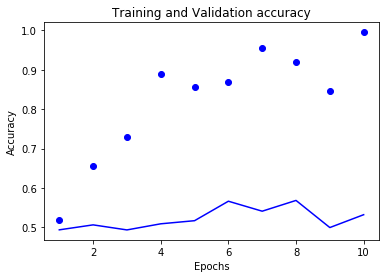

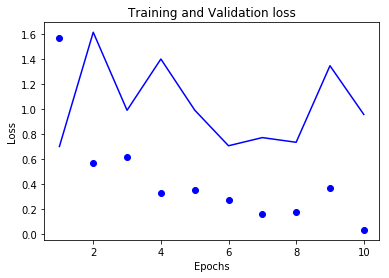

In [30]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 216us/step - loss: 7.9746 - binary_accuracy: 0.5042 - val_loss: 8.1703 - val_binary_accuracy: 0.4931
Epoch 2/10
15000/15000 [==============================] - 2s 165us/step - loss: 7.9849 - binary_accuracy: 0.5046 - val_loss: 8.1703 - val_binary_accuracy: 0.4931
Epoch 3/10
15000/15000 [==============================] - 2s 157us/step - loss: 7.9849 - binary_accuracy: 0.5046 - val_loss: 8.1703 - val_binary_accuracy: 0.4931
Epoch 4/10
15000/15000 [==============================] - 2s 156us/step - loss: 7.9849 - binary_accuracy: 0.5046 - val_loss: 8.1703 - val_binary_accuracy: 0.4931
Epoch 5/10
15000/15000 [==============================] - 2s 165us/step - loss: 7.9849 - binary_accuracy: 0.5046 - val_loss: 8.1703 - val_binary_accuracy: 0.4931
Epoch 6/10
15000/15000 [==============================] - 2s 163us/step - loss: 7.9849 - binary_accuracy: 0.5046 - val_loss: 8.1703 - val_bi

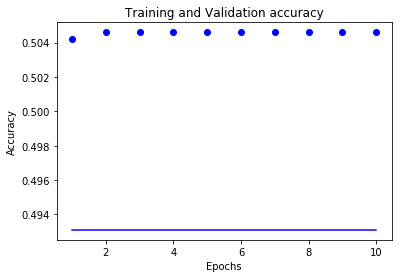

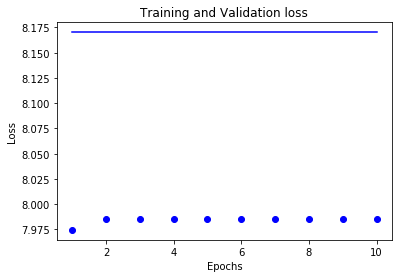

In [31]:
# training model joinly
training_samples = 15000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

model = keras.Sequential()
model.add(keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_val, y_val))

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [32]:
# evaluate the first model on the test data
test_dir = os.path.join(imdb_dir, 'test')
texts = []
labels = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'r')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights('pretrained_glove_model.h5')
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 43us/step


In [33]:
results

[0.9591104674434662, 0.53516]